In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 91kB/s 
     |████████████████████████████████| 3.8MB 29.7MB/s 
     |████████████████████████████████| 450kB 44.0MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
tf.__version__

'2.3.0'

# Tensors

In [3]:
x = tf.constant(1)
print(x)

tf.Tensor(1, shape=(), dtype=int32)


In [4]:
x.numpy()

1

In [5]:
x.shape

TensorShape([])

In [6]:
tf.rank(x).numpy()

0

In [7]:
m = tf.constant([[1, 2, 1], [3, 4, 2]])
print(m)

tf.Tensor(
[[1 2 1]
 [3 4 2]], shape=(2, 3), dtype=int32)


In [8]:
st = tf.constant(["Hello", "World"])

In [9]:
print(st)

tf.Tensor([b'Hello' b'World'], shape=(2,), dtype=string)


In [10]:
tf.rank(st).numpy()

1

## Helpers

In [11]:
ones = tf.ones([3, 3])
print(ones)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [12]:
zeros = tf.zeros([2, 3])

In [13]:
print(zeros)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [14]:
print(tf.reshape(zeros, [3, 2]))

tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [15]:
tf.transpose(zeros)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

# Tensor Math

In [16]:
a = tf.constant(1)
b = tf.constant(1)

tf.add(a, b).numpy()

2

In [17]:
(a + b).numpy()

2

In [18]:
c = a + b
tf.square(c)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [19]:
c * c

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [20]:
d1 = tf.constant([[1, 2], [1, 2]]);
d2 = tf.constant([[3, 4], [3, 4]]);

tf.tensordot(d1, d2, axes=1).numpy()

array([[ 9, 12],
       [ 9, 12]])

# Sampling

In [21]:
norm = tf.random.normal(shape=(1000, 1), mean=0., stddev=1.)

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


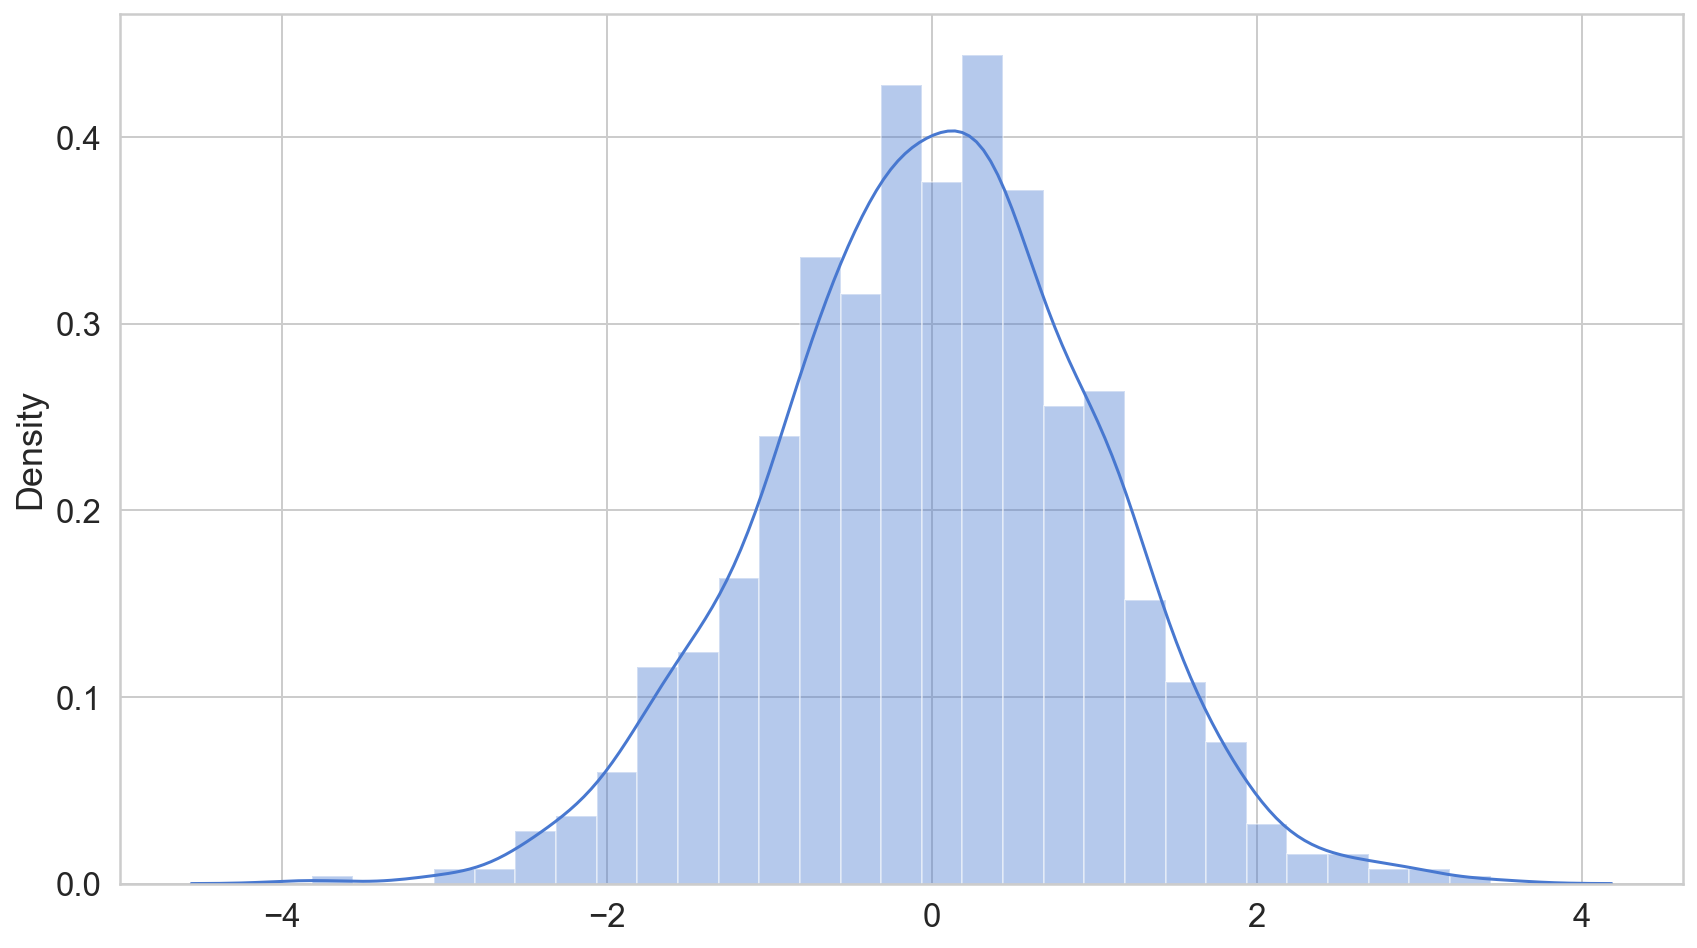

In [22]:
sns.distplot(norm);

In [23]:
unif = tf.random.uniform(shape=(1000, 1), minval=0, maxval=100)

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


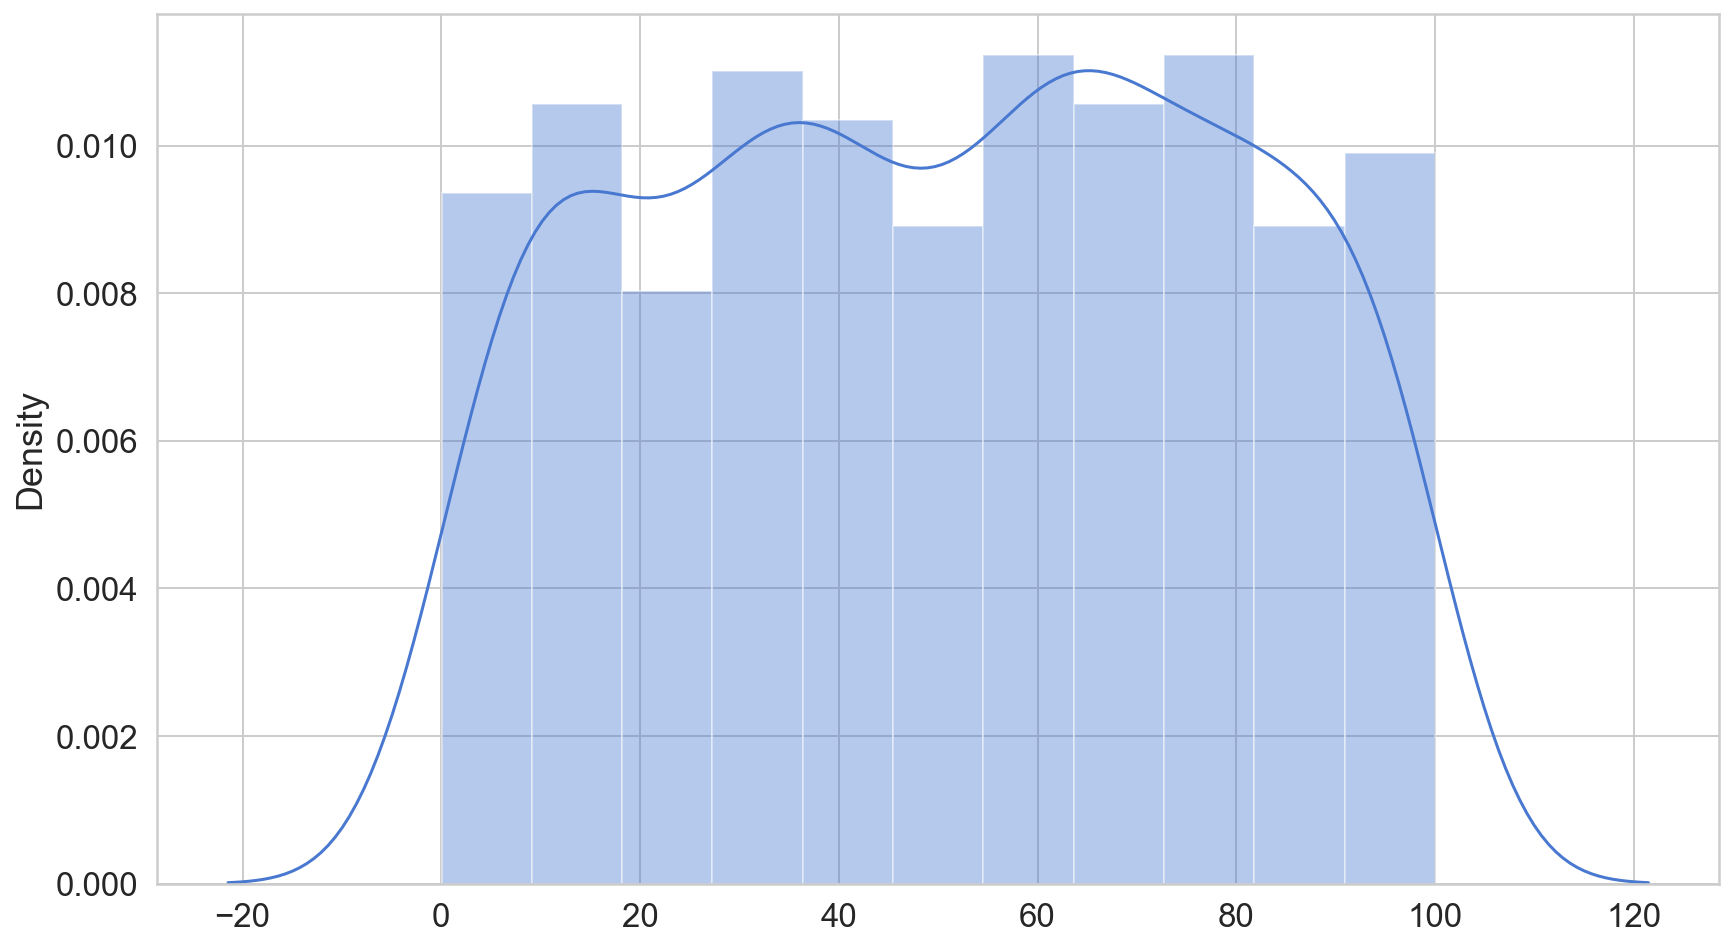

In [24]:
sns.distplot(unif);

In [25]:
pois = tf.random.poisson(shape=(1000, 1), lam=0.8)

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


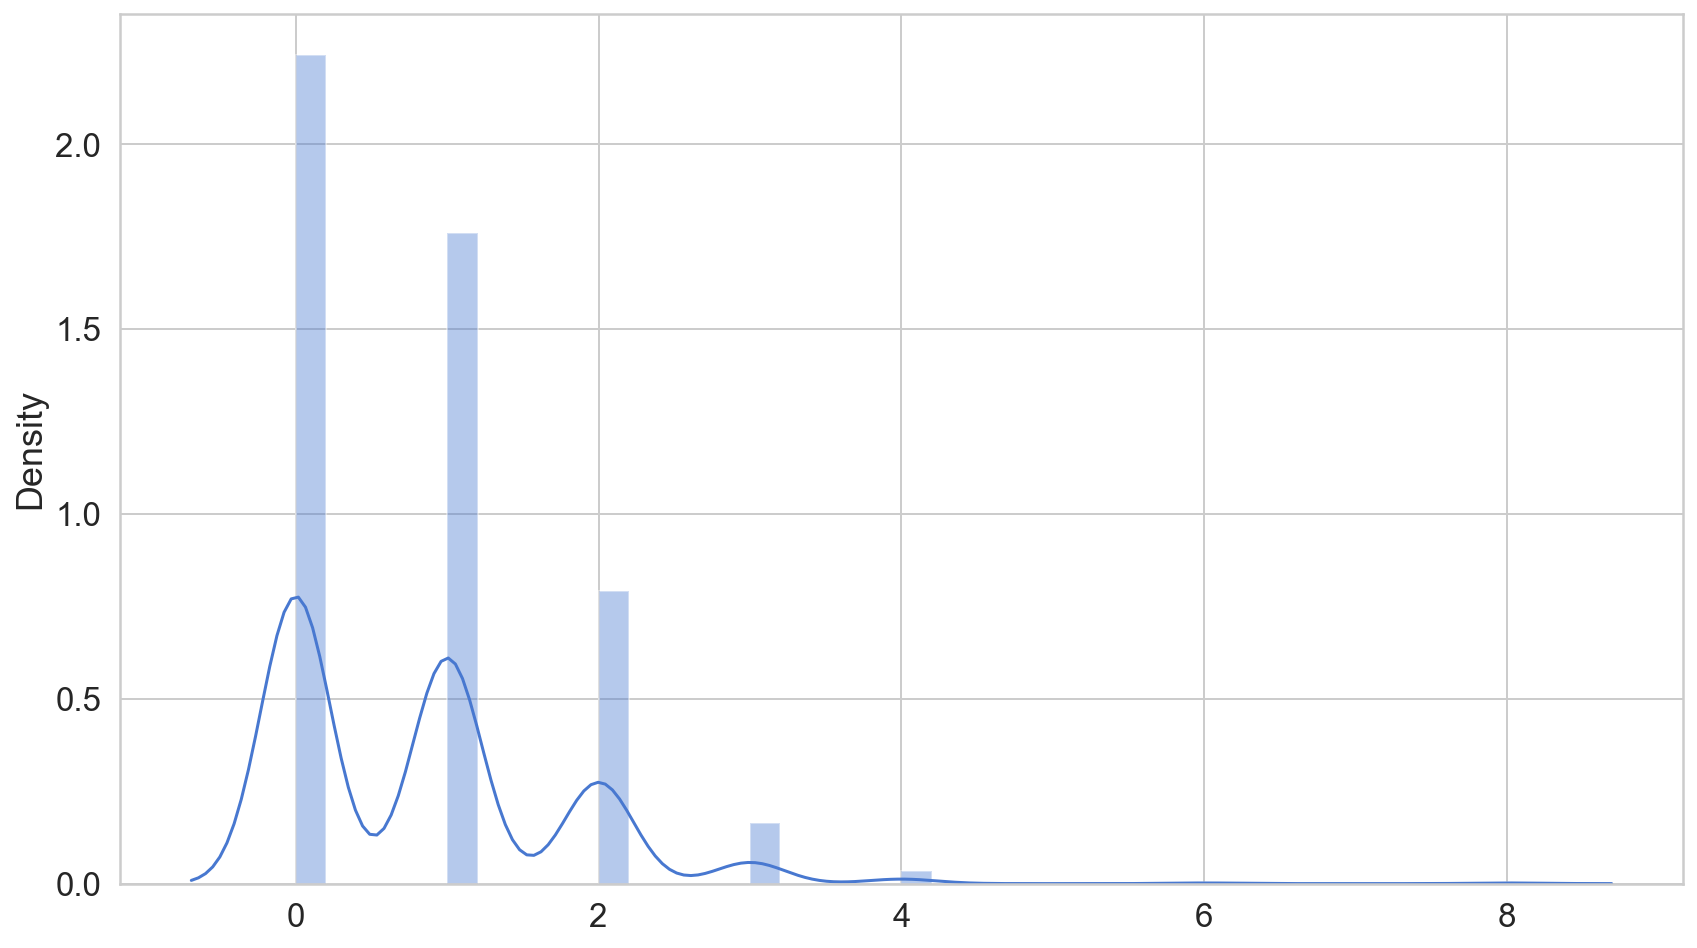

In [26]:
sns.distplot(pois);

In [27]:
gam = tf.random.gamma(shape=(1000, 1), alpha=0.8)

C:\Users\91797\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


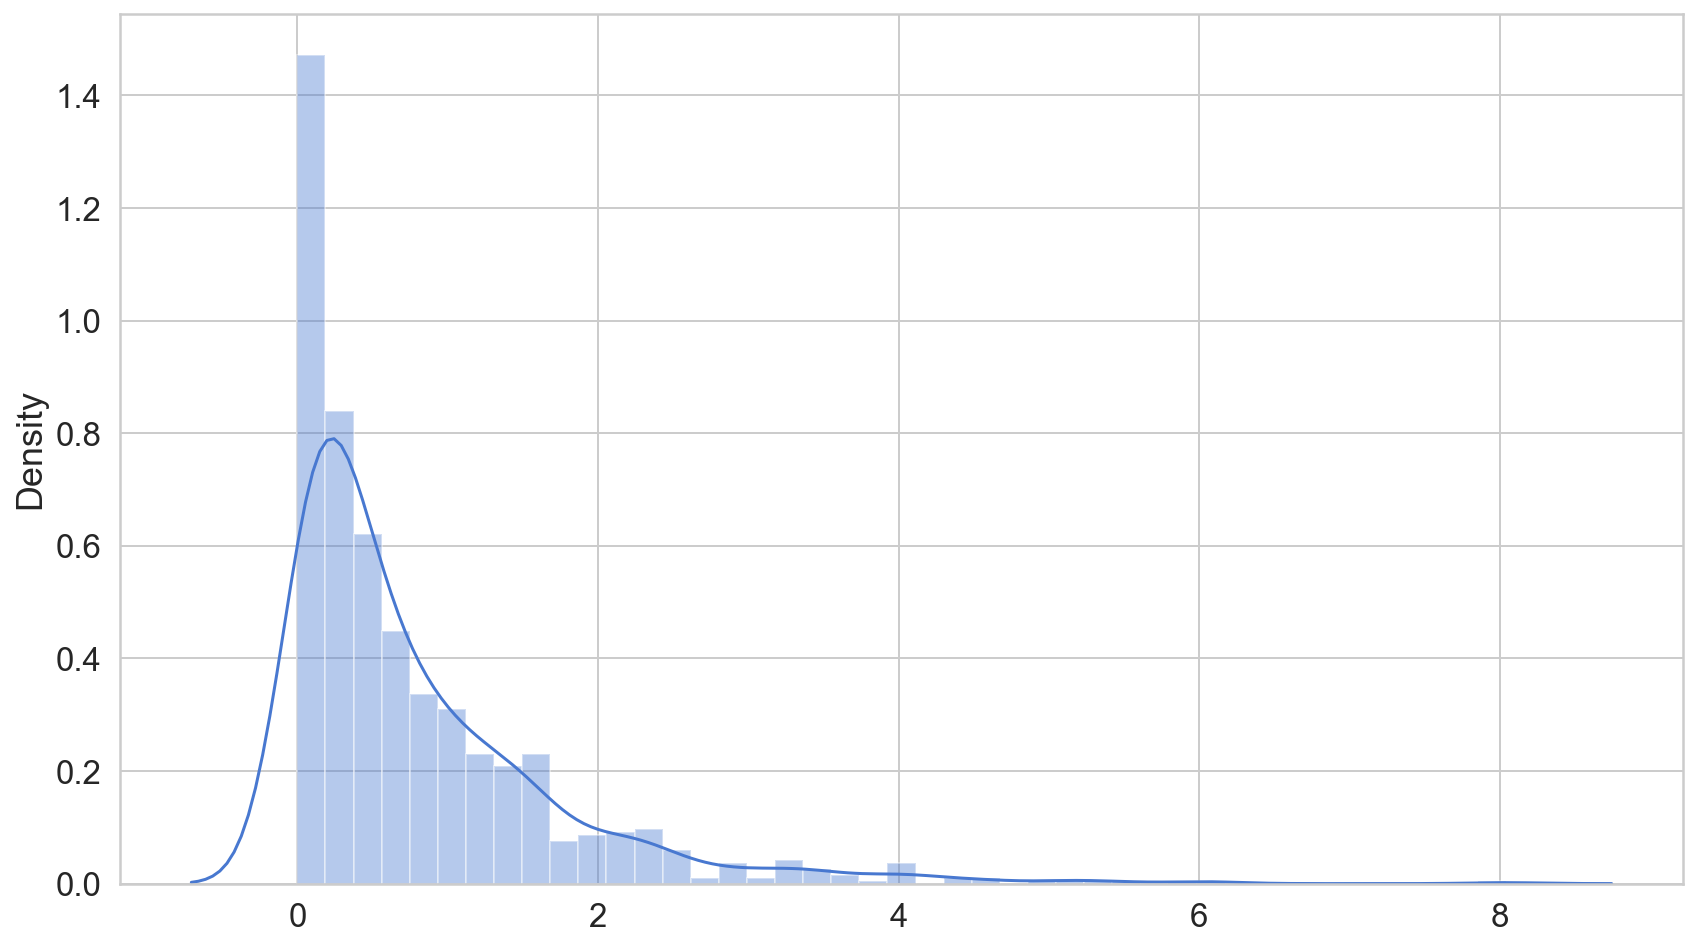

In [28]:
sns.distplot(gam);

# Linear Regression

https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [29]:
data = tf.constant([
  [4,2],
  [4,10],
  [7,4],
  [7,22],
  [8,16],
  [9,10],
  [10,18],
  [10,26],
  [10,34],
  [11,17],
  [11,28],
  [12,14],
  [12,20],
  [12,24],
  [12,28],
  [13,26],
  [13,34],
  [13,34],
  [13,46],
  [14,26],
  [14,36],
  [14,60],
  [14,80],
  [15,20],
  [15,26],
  [15,54],
  [16,32],
  [16,40],
  [17,32],
  [17,40],
  [17,50],
  [18,42],
  [18,56],
  [18,76],
  [18,84],
  [19,36],
  [19,46],
  [19,68],
  [20,32],
  [20,48],
  [20,52],
  [20,56],
  [20,64],
  [22,66],
  [23,54],
  [24,70],
  [24,92],
  [24,93],
  [24,120],
  [25,85]
])

In [30]:
speed = data[:, 0]
stopping_distance = data[:, 1]

C:\Users\91797\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


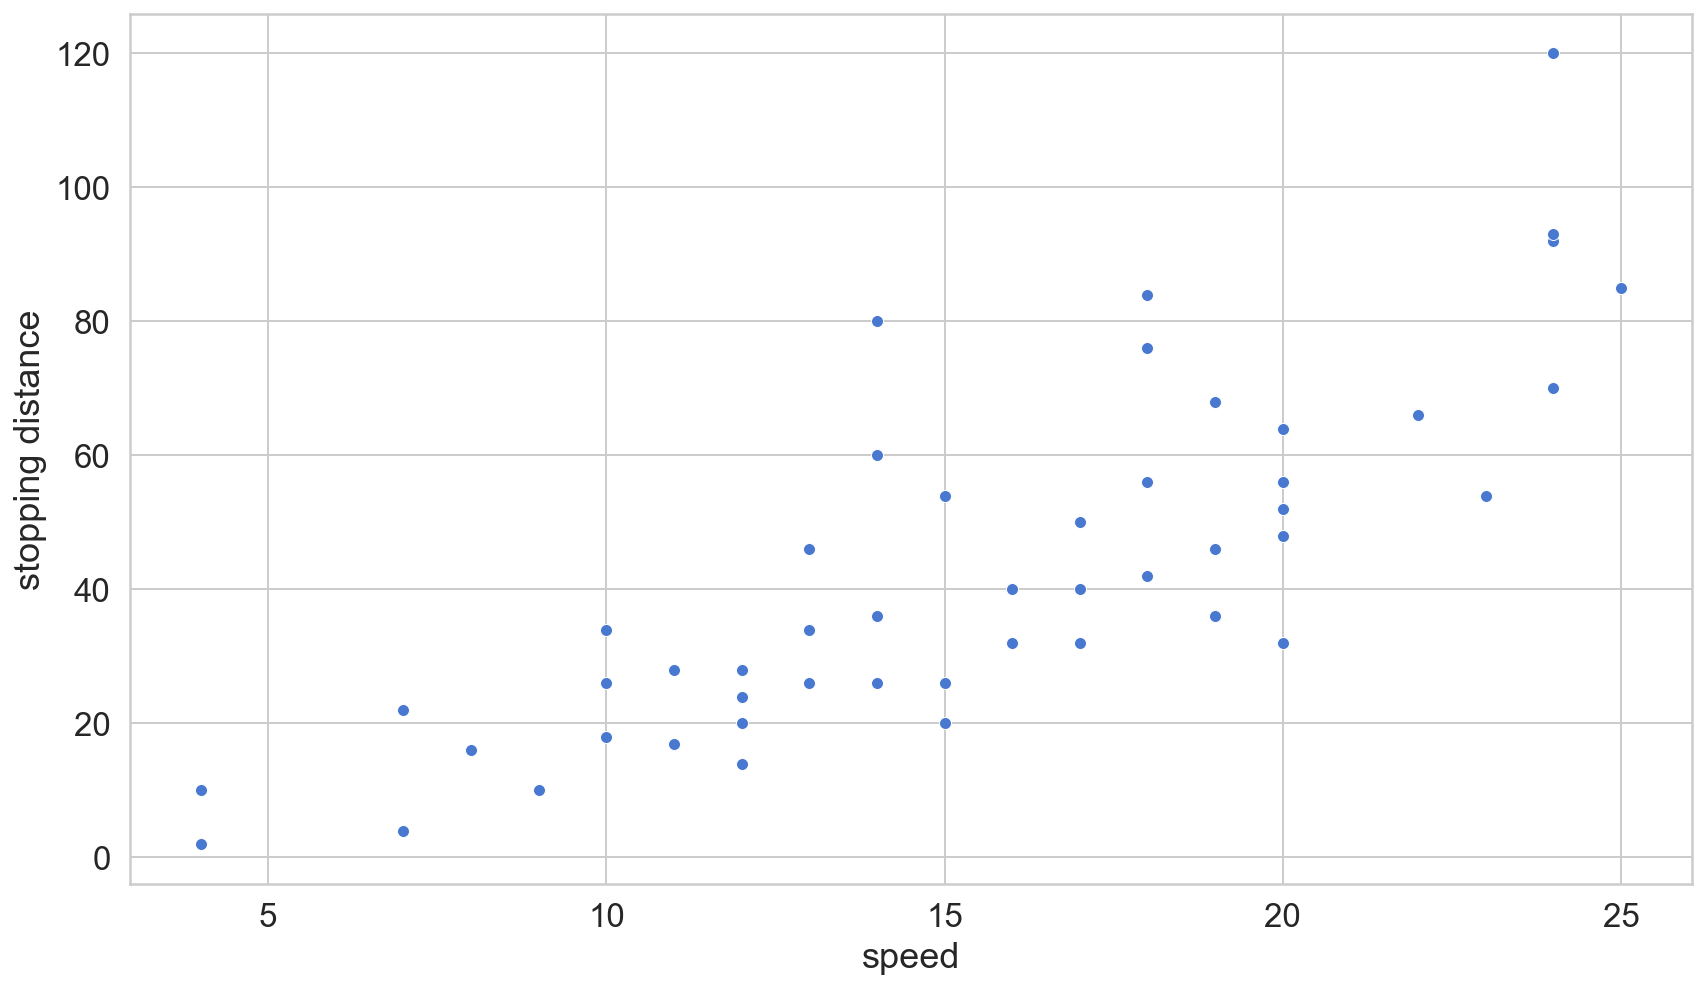

In [31]:
sns.scatterplot(speed, stopping_distance);
plt.xlabel("speed")
plt.ylabel("stopping distance");

In [32]:
lin_reg = keras.Sequential([
  layers.Dense(1, activation='linear', input_shape=[1]),
])

In [33]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

lin_reg.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

In [34]:
history = lin_reg.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

In [35]:
def plot_error(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')

  plt.legend()
  plt.show()

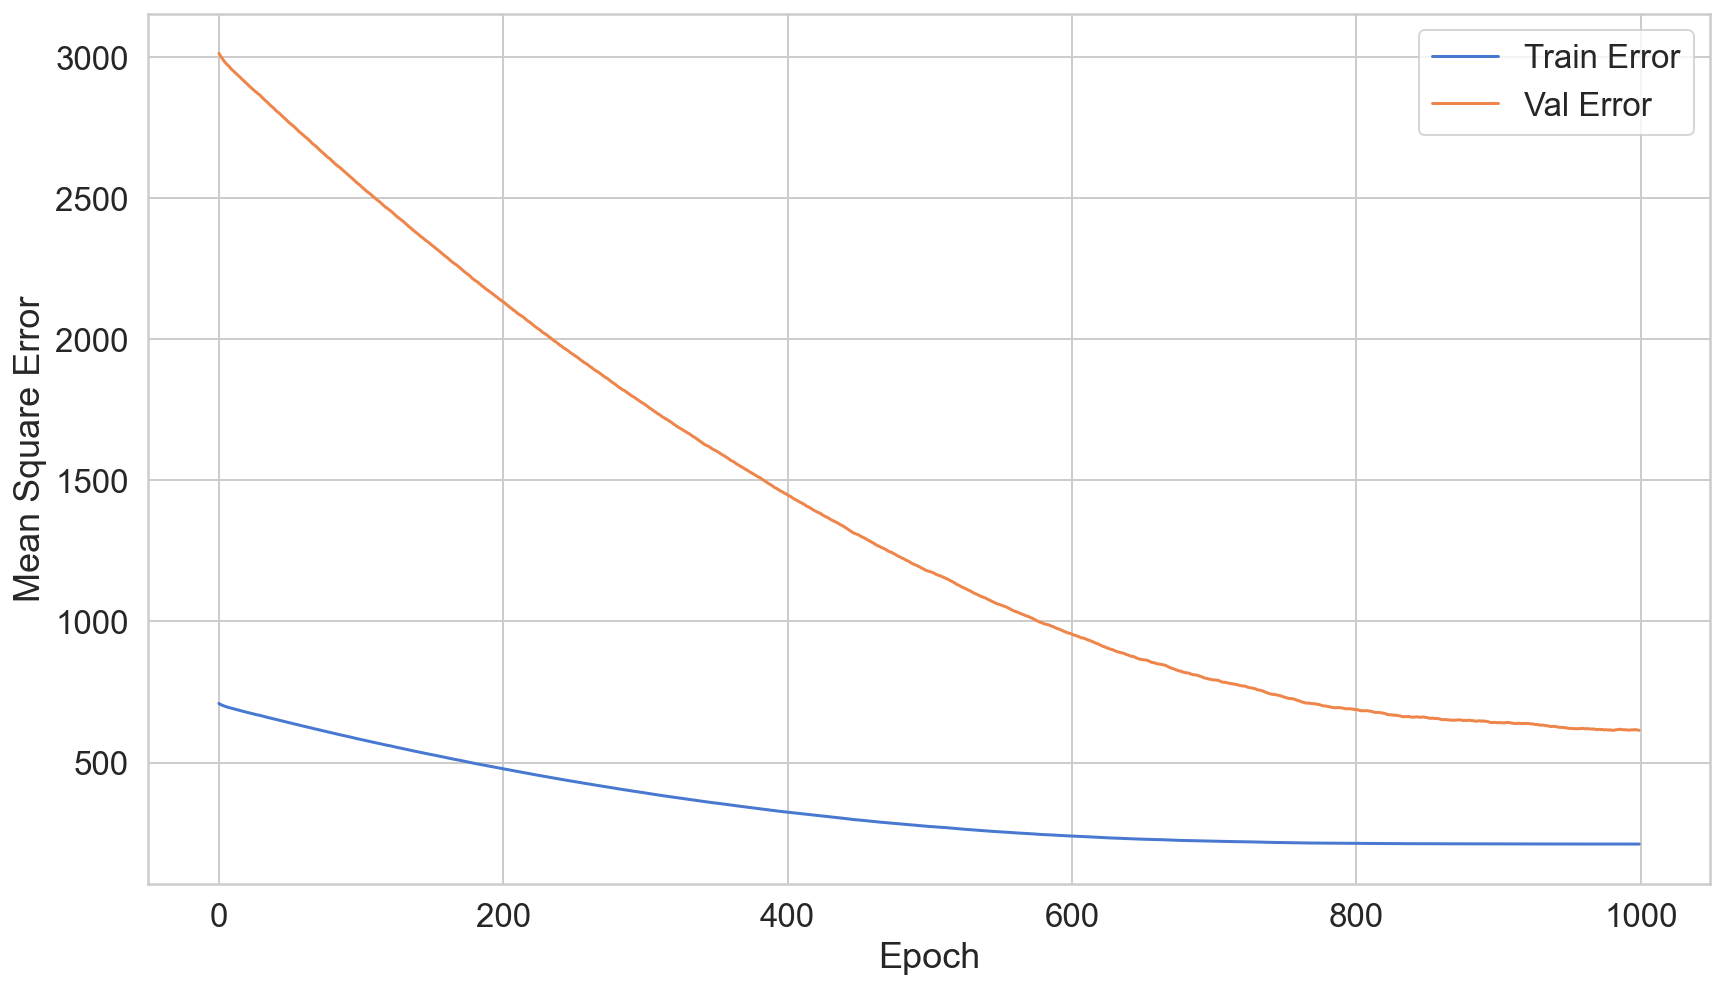

In [36]:
plot_error(history)

In [37]:
lin_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
weights = lin_reg.get_layer("dense").get_weights()
intercept = weights[0][0][0]
slope = weights[1][0]

In [39]:
slope

1.3195587

# Simple Neural Network

In [40]:
def build_neural_net():
  net = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[1]),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
  ])
   
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  net.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse', 'accuracy'])
  
  return net

In [41]:
net = build_neural_net()

In [42]:
history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

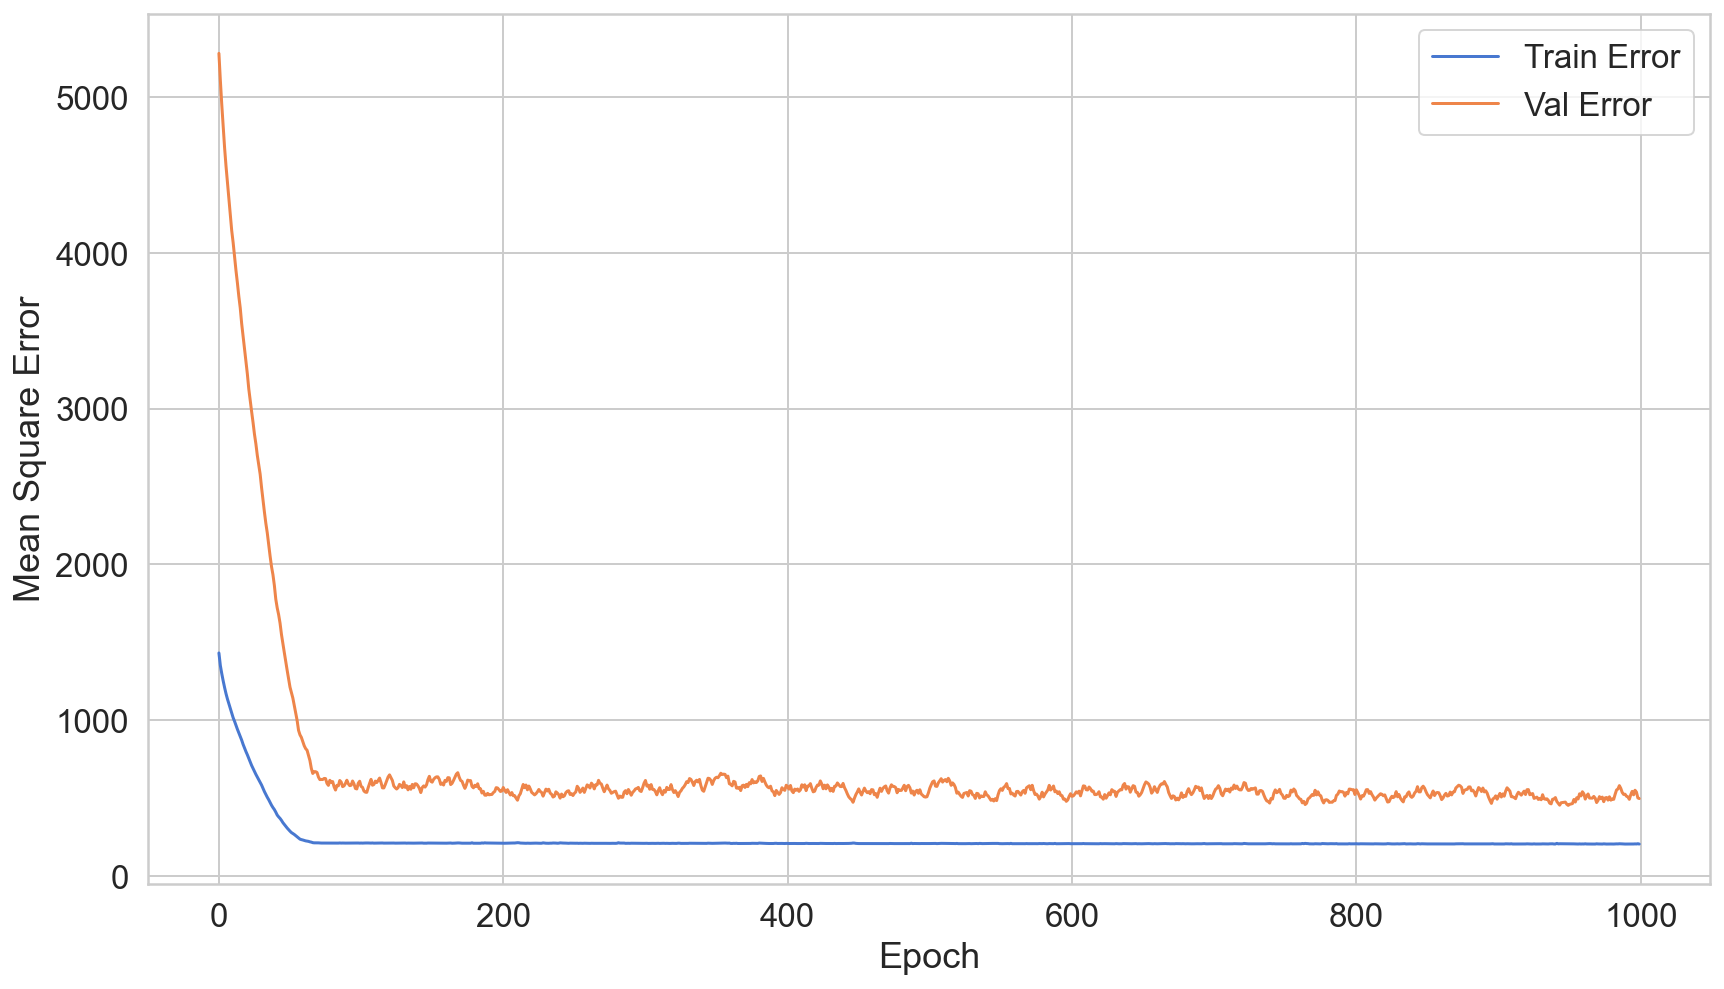

In [43]:
plot_error(history)

## Stop training early

In [0]:
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=10
)

In [0]:
net = build_neural_net()

history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0,
  callbacks=[early_stop]
)

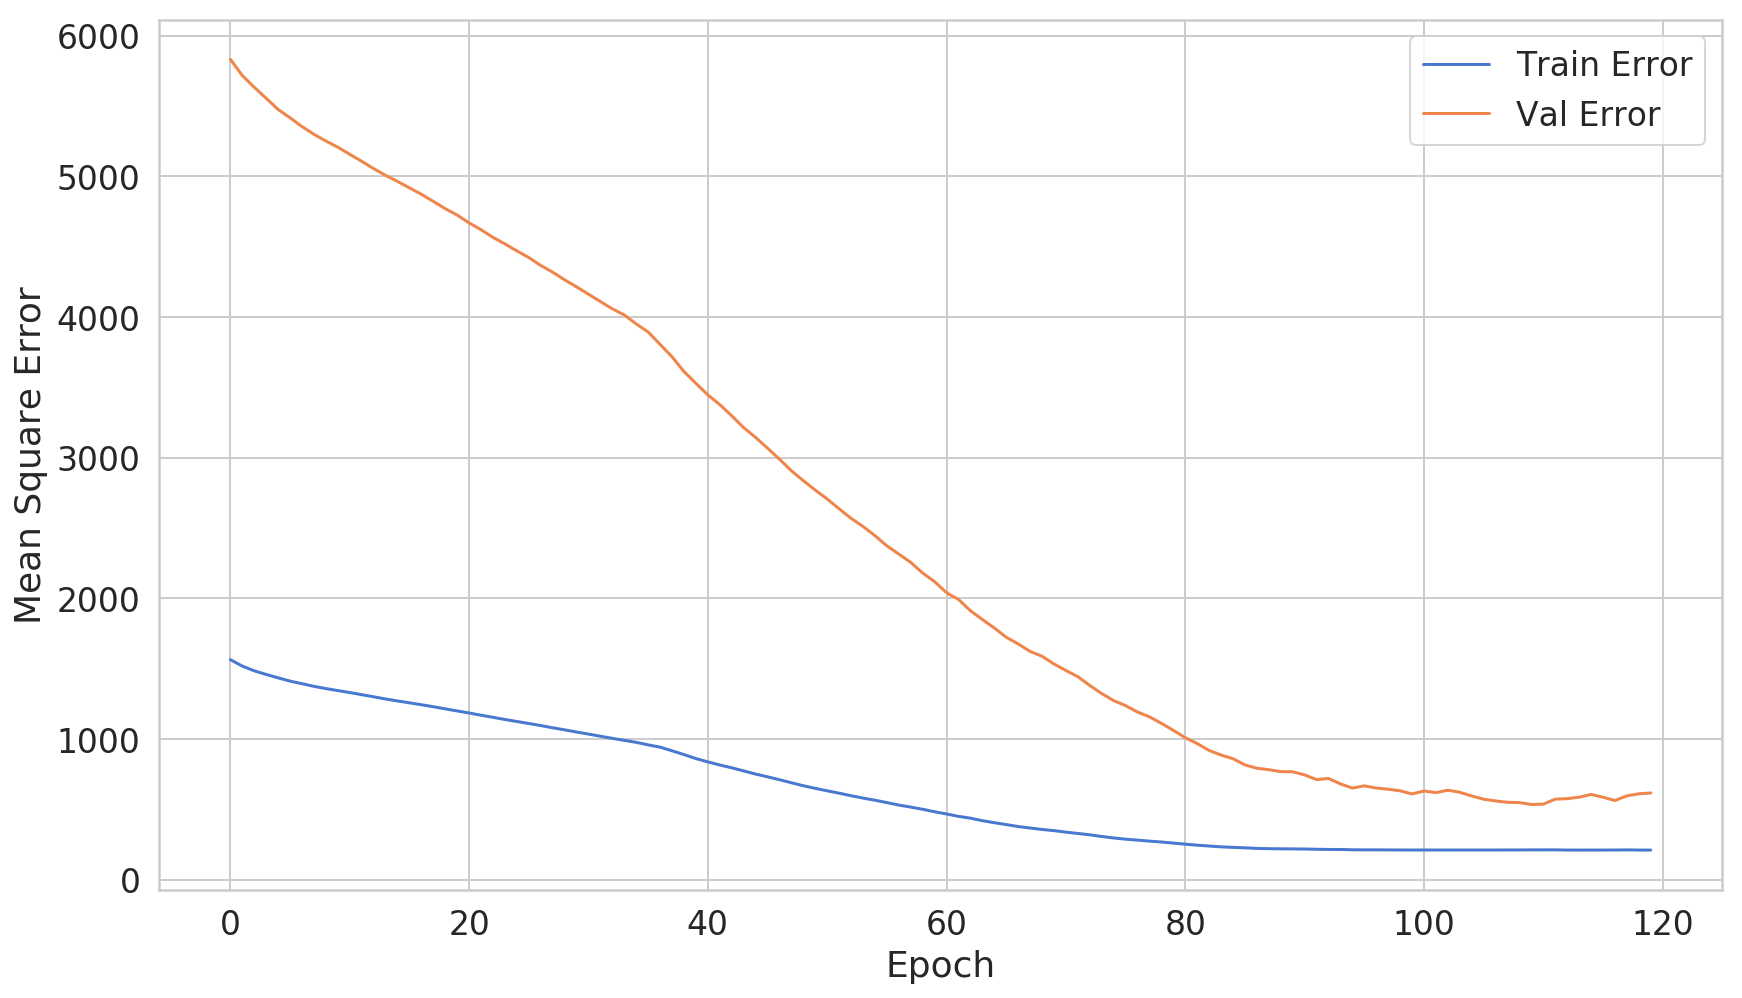

In [0]:
plot_error(history)

# Save/Restore Model

In [0]:
net.save('simple_net.h5')

In [0]:
simple_net = keras.models.load_model('simple_net.h5')

In [0]:
simple_net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
